In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !unzip /content/drive/MyDrive/nepali_ocr/devanagari+handwritten+character+dataset.zip -d /content/drive/MyDrive/nepali_ocr/dataset

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

tf.__version__


'2.12.0'

In [4]:
S = 32 # imnput shape of our model

# rescale our images
trainDatagen = ImageDataGenerator(rescale=1./255)

testDatagen = ImageDataGenerator(rescale=
                                 1./255)
# minor image processing
train_set = trainDatagen.flow_from_directory(
        '/content/drive/MyDrive/nepali_ocr/dataset/DevanagariHandwrittenCharacterDataset/Train',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_set = testDatagen.flow_from_directory(
        '/content/drive/MyDrive/nepali_ocr/dataset/DevanagariHandwrittenCharacterDataset/Test',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/nepali_ocr/dataset/DevanagariHandwrittenCharacterDataset/Train'

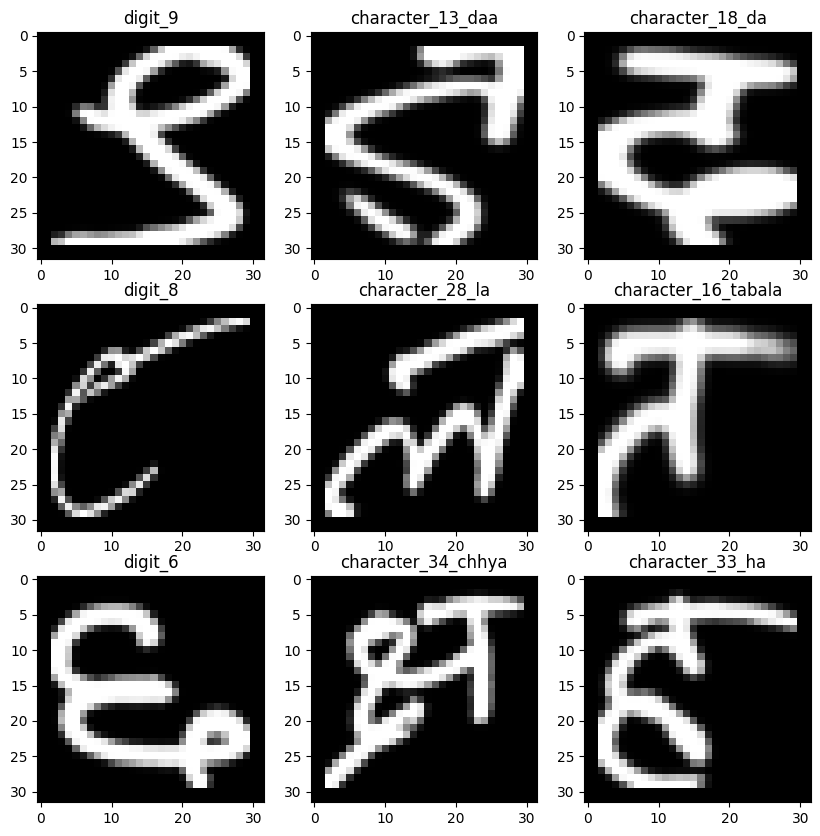

In [ ]:
classes = list(train_set.class_indices.keys())
r=3
c=3
fig = plt.figure(figsize=(10, 10))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = train_set[i][1][i]
    img = train_set[i][0][i]
    plt.title(classes[np.argmax(lbl)])
    plt.imshow(img.reshape(32, 32), cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(46, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
import time
time1 = time.time()

from keras.callbacks import ModelCheckpoint

# Define a callback to save the best weights
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/nepali_ocr/best_weights.h5',
    monitor='val_accuracy',  # You can also use 'val_loss'
    verbose=1,
    save_best_only=True,
    mode='max'  # Use 'min' for val_loss
)

history = model.fit_generator(train_set, steps_per_epoch=len(train_set),
                           epochs=10,
                           validation_data=test_set,
                           validation_steps=10,
                          callbacks=[checkpoint],
                           verbose = 1)
time2 = time.time()
score = model.evaluate_generator(test_set, steps=1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Epoch 1/10
   1/2444 [..............................] - ETA: 2:55 - loss: 1.7444 - accuracy: 0.4688

<ipython-input-13-051cbfb660a7>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, steps_per_epoch=len(train_set),


2444/2444 [==============================] - ETA: 0s - loss: 0.4919 - accuracy: 0.8490
Epoch 1: val_accuracy improved from -inf to 0.92813, saving model to /content/drive/MyDrive/nepali_ocr/best_weights.h5
2444/2444 [==============================] - 149s 61ms/step - loss: 0.4919 - accuracy: 0.8490 - val_loss: 0.2661 - val_accuracy: 0.9281
Epoch 2/10
2444/2444 [==============================] - ETA: 0s - loss: 0.1920 - accuracy: 0.9407
Epoch 2: val_accuracy improved from 0.92813 to 0.95625, saving model to /content/drive/MyDrive/nepali_ocr/best_weights.h5
2444/2444 [==============================] - 151s 62ms/step - loss: 0.1920 - accuracy: 0.9407 - val_loss: 0.1148 - val_accuracy: 0.9563
Epoch 3/10
2444/2444 [==============================] - ETA: 0s - loss: 0.1267 - accuracy: 0.9607
Epoch 3: val_accuracy did not improve from 0.95625
2444/2444 [==============================] - 161s 66ms/step - loss: 0.1267 - accuracy: 0.9607 - val_loss: 0.2011 - val_accuracy: 0.9563
Epoch 4/10
2444/2

<ipython-input-13-051cbfb660a7>:22: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_set, steps=1)


Train time =  36.10472335020701 min 
Test time =  0.004583470026652018 min 
 Test loss:  0.031233681365847588  Test accuracy:  0.96875


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


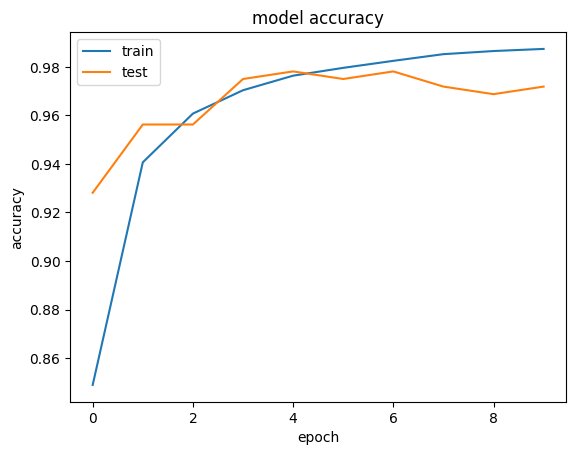

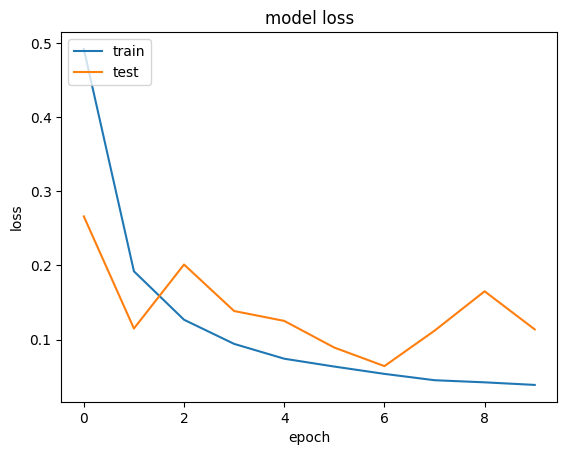

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

model_json = model.to_json()

with open("/content/drive/MyDrive/nepali_ocr/classifier.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/nepali_ocr/classifier.h5")



In [ ]:
model.save("/content/drive/MyDrive/nepali_ocr/whole_classifier.h5")

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


testDatagen = ImageDataGenerator(rescale=1./255)

test_set = testDatagen.flow_from_directory(
        'devanagari+handwritten+character+dataset\DevanagariHandwrittenCharacterDataset\Test',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')


Found 13800 images belonging to 46 classes.


In [ ]:
loaded_model = tf.keras.models.load_model("best_weights.h5")
score = loaded_model.evaluate(test_set, steps=1)
score


1/1 [==============================] - 0s 225ms/step - loss: 0.0425 - accuracy: 0.9688


[0.042517486959695816, 0.96875]

In [ ]:
import cv2
image_path = "/content/4.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (32, 32))
# image = np.expand_dims(image, axis=0)
image = np.array(image)
image = image.reshape((1,32, 32,1))

# Make a prediction
predictions = loaded_model.predict(image)
print(predictions)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

print("Real: 0 Predicted class index:", classes[predicted_class_index])

1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Real: 0 Predicted class index: character_2_kha


<ipython-input-37-bd8172785d11>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<class 'numpy.ndarray'>
1/1 [==============================] - 0s 37ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 49ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 37ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 29ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 39ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 42ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 32ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 36ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 28ms/step


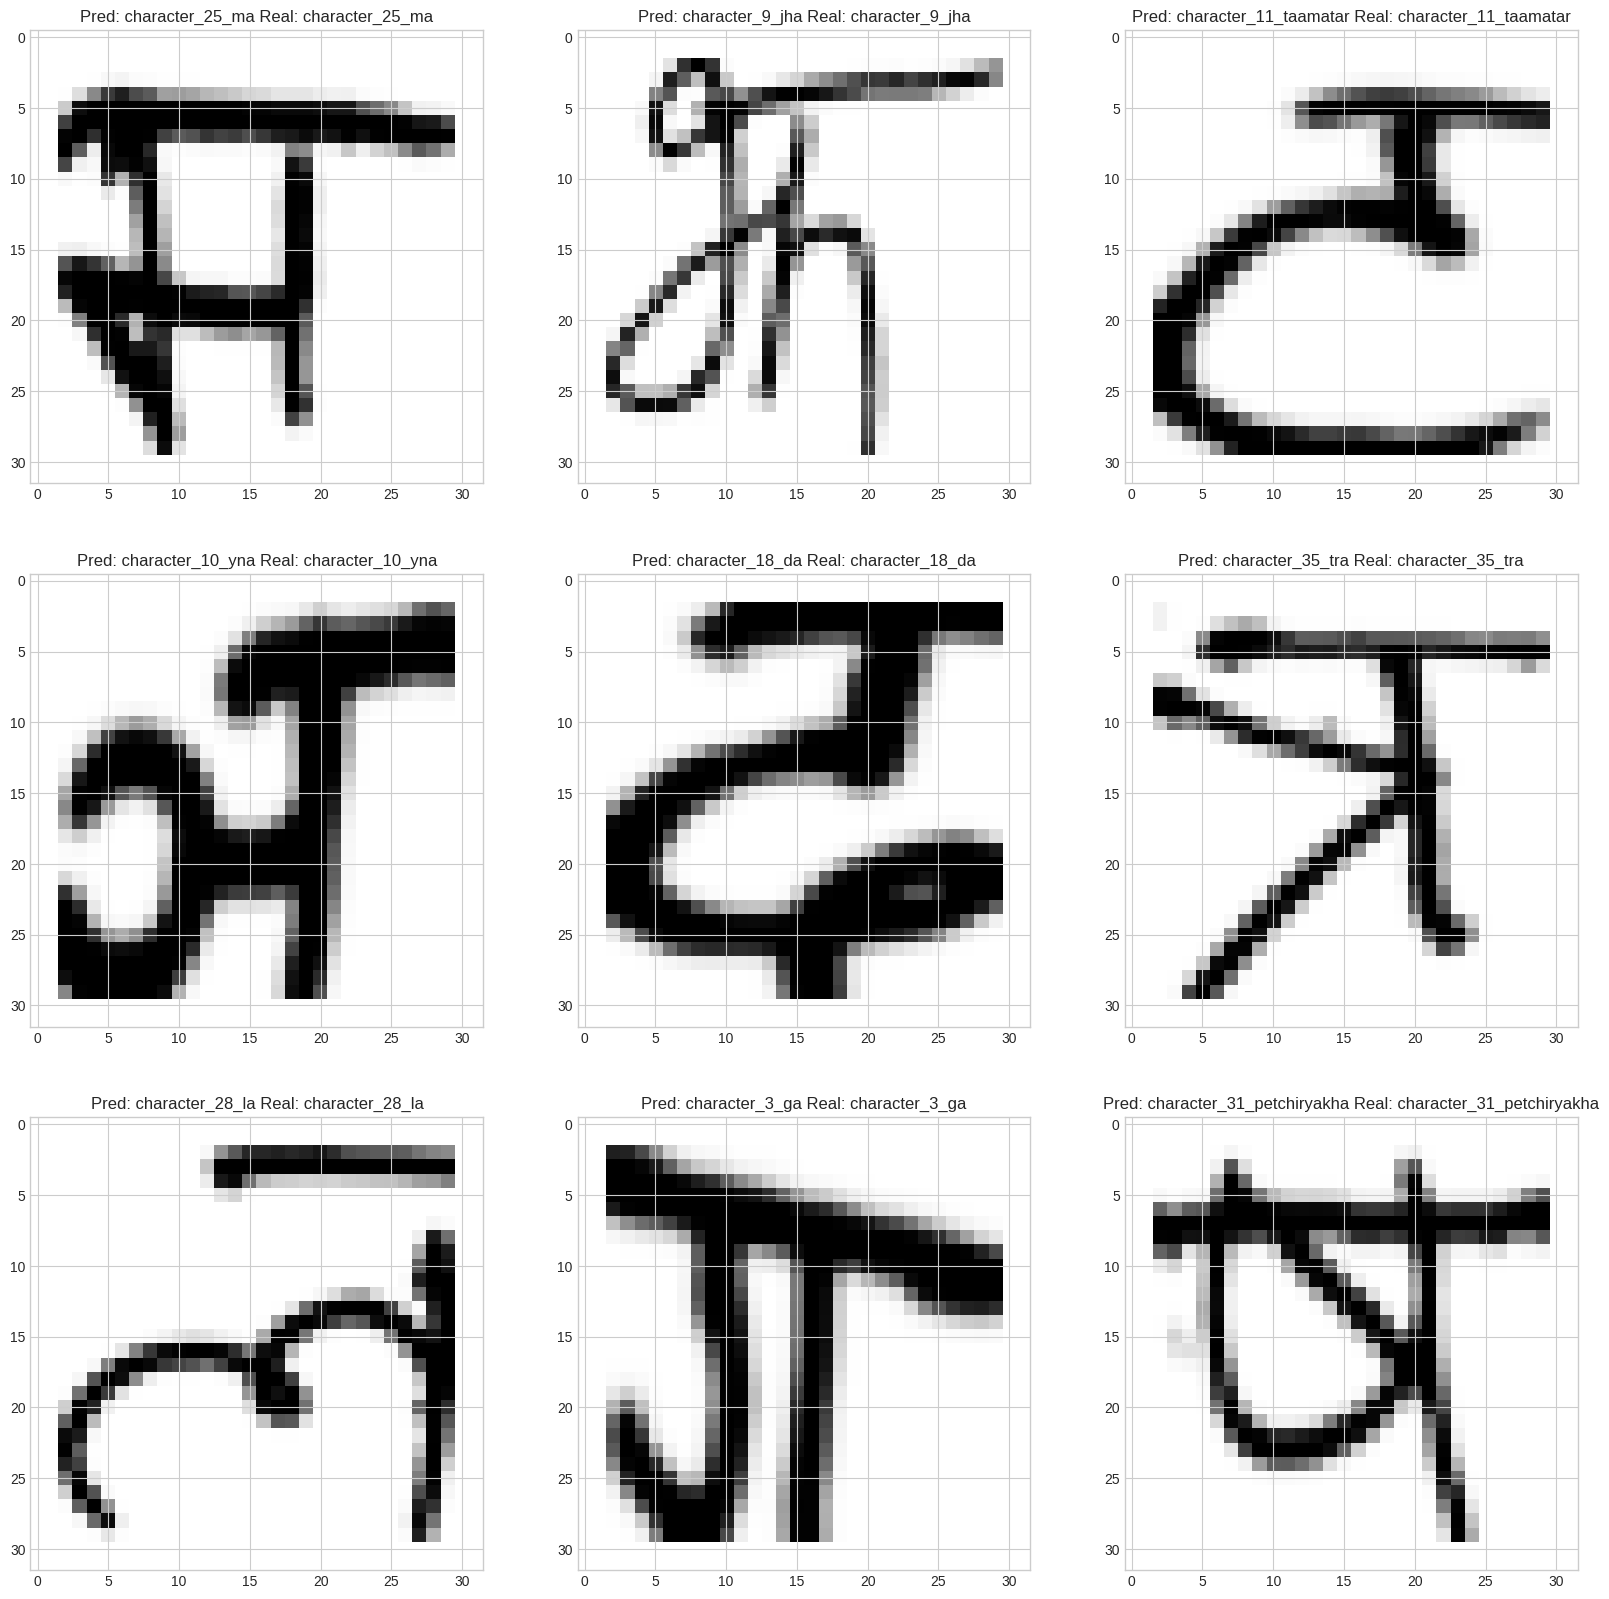

In [ ]:
plt.style.use('seaborn-whitegrid')
r=3
c=3
fig = plt.figure(figsize=(20, 20))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = test_set[i][1][i]
    img = test_set[i][0][i]
    print(type(img))
    img = img.reshape(1, S, S, 1)
    prediction = model.predict(img)

    prediction = np.argmax(prediction)
    title = f"Pred: {classes[prediction]} Real: {classes[np.argmax(lbl)]}"
    plt.title(title)
    plt.imshow(img.reshape(32, 32))
plt.show()